In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Aprendizaje Supervisado 
# Regresión Lineal Simple

Autor: Mgtr. Ing. Mariano Martín Gualpa

En este documento, revisaremos algunos conceptos relacionados con los modelos de regresión lineal.

Vamos a trabajar con algunos números aleatorios. Para ello es necesario establecer una semilla para facilitar la reproducibilidad. 

In [3]:
np.random.seed(20)

# 1. Generación del Conjunto de Datos Sintético

Generaremos una distribución artificial para hacer algunas pruebas.
Para ello, generaremos un conjunto X con sus correspondientes y, asociados por una función subyacente que las relaciona. Agregaremos un poco de ruido aleatorio para asemejarlo un poco a las condiciones normales en que podríamos encontrar la información de un set de datos real.


In [4]:
n_samples = 50

Primero generamos un conjunto de valores aleatorio para x, con una distribución uniforme dentro del espacio [0, 50].

In [5]:
x = np.random.uniform(0, 50, n_samples)
print(x)

[29.40654005 44.8856864  44.57653647 40.79187387  1.79447928 34.58787909
 18.9340471  25.92554727 32.89757328  9.69251089 13.6158201  35.93029668
 39.15018047 42.51638199 38.7622447   1.83321532  5.83468676 37.56403497
 11.96091081 12.7403007  42.88127656 47.48895131 28.0843429   8.93902599
 38.51259666 24.61905198 31.56265328 41.97489615 23.05196981 24.89700367
 33.97055588 32.53929571 13.43976194  3.36623335 38.57225692 24.04920661
 16.46032039 25.53205281 13.18144143 15.5255775  31.34267189 27.87249053
 15.92897798 19.74216104 12.89872929 29.11205616  8.08143552 29.90669099
 41.29117886  7.81958593]


Establecemos los parámetros de la función subyacente. Se trata de una función lineal simple: $$ y = b  + a x $$ <br>
Sobre ella, agregaremos un poco de ruido guassiano. Los parámetros de la función serán:

In [6]:
b = 10
a = 0.5
mu = 0
sigma = 4


A partir de estos parámetros, generamos los valores correspondientes de la variable y asociados a cada elemento de x:

In [7]:
y = b + a * x + np.random.normal(mu, sigma, size=len(x))
print(y)

[22.29403795 38.62175664 34.87640457 32.76880578 12.64933763 32.7250956
 24.28506865 28.36995838 28.42253558  4.02879446 14.58716686 27.97118258
 33.0034655  37.18276558 28.50247786 16.93020029  6.98780318 25.35736061
 12.66568432 16.82634076 33.55155216 34.36782854 29.24788904 10.49030537
 37.63495968 23.74724197 28.54533511 25.04456964 21.92113937 21.53521771
 23.56617599 24.21706743 12.87101703  9.75331303 28.32824943 23.86358022
 20.81588086 24.71563825 16.74349059 21.72073499 26.24582648 26.93743698
 16.32620329 25.66070871 14.83122855 29.15172814 10.2850758  17.34748929
 35.02732284 12.57561782]


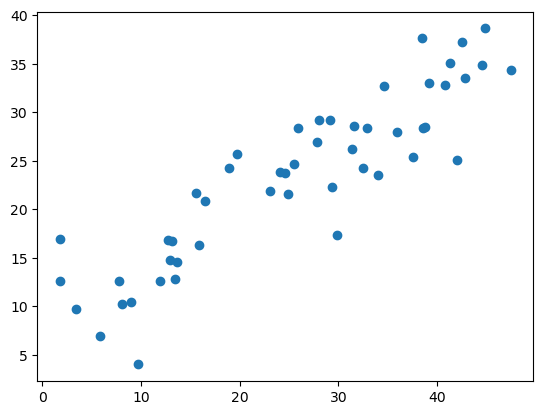

In [8]:
plt.plot(x, y, 'o');

Hemos generado así un dataset artificial, que nos servirá para poder entender mejor los conceptos relacionados a esta unidad. Podríamos suponer que este conjunto de datos representa a dos variables cuya relación desconocemos y de la que solo tenemos los valores disponibles.

# 2. Generar el Modelo Lineal a partir de una Regresión Lineal Simple
El objetivo es encontrar a partir de los datos, una función h(x) que permita estimar el valor correspondiente de y. Existen muchos modelos que pueden ayudarnos, en este caso utilizaremos un modelo lineal: $$ \widehat{y} = w_0 + w_1 * x$$

En sklearn, disponemos de la clase `LinearRegression` (referencia a la [*API*](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)), que implementa un tipo de regresión llamada Ordinary Least Squares (OLS). 



## 2.1. Preparación del dataset.

Para realizar el entrenamiento, la API de sklearn requiere normalmente dos parámetros: 

el conjunto de valores de la variable objetivo ($\mathbf{y}$) en la forma de un array de 1 dimensión.
el conjunto de valores de las variables Xi, en la forma de un array de dos dimensiones es decir una matriz ($X$).

Cada fila de ($X$) corresponde a un ejemplo y tendrá asociado un elemento correspondiente en el vector($\mathbf{y}$). Cada columna, corresponderá a una variable, característica o feature.


In [9]:
x.shape

(50,)

In [10]:
x

array([29.40654005, 44.8856864 , 44.57653647, 40.79187387,  1.79447928,
       34.58787909, 18.9340471 , 25.92554727, 32.89757328,  9.69251089,
       13.6158201 , 35.93029668, 39.15018047, 42.51638199, 38.7622447 ,
        1.83321532,  5.83468676, 37.56403497, 11.96091081, 12.7403007 ,
       42.88127656, 47.48895131, 28.0843429 ,  8.93902599, 38.51259666,
       24.61905198, 31.56265328, 41.97489615, 23.05196981, 24.89700367,
       33.97055588, 32.53929571, 13.43976194,  3.36623335, 38.57225692,
       24.04920661, 16.46032039, 25.53205281, 13.18144143, 15.5255775 ,
       31.34267189, 27.87249053, 15.92897798, 19.74216104, 12.89872929,
       29.11205616,  8.08143552, 29.90669099, 41.29117886,  7.81958593])

Puede observarse que ($\mathbf{x}$) es un array de una dimensión (vector), por lo que deberíamos realizar la conversión a un array bi-dimensional (matriz), que en este caso tendrá una única columna y una fila por cada ejemplo. 

In [11]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [12]:
X

array([[29.40654005],
       [44.8856864 ],
       [44.57653647],
       [40.79187387],
       [ 1.79447928],
       [34.58787909],
       [18.9340471 ],
       [25.92554727],
       [32.89757328],
       [ 9.69251089],
       [13.6158201 ],
       [35.93029668],
       [39.15018047],
       [42.51638199],
       [38.7622447 ],
       [ 1.83321532],
       [ 5.83468676],
       [37.56403497],
       [11.96091081],
       [12.7403007 ],
       [42.88127656],
       [47.48895131],
       [28.0843429 ],
       [ 8.93902599],
       [38.51259666],
       [24.61905198],
       [31.56265328],
       [41.97489615],
       [23.05196981],
       [24.89700367],
       [33.97055588],
       [32.53929571],
       [13.43976194],
       [ 3.36623335],
       [38.57225692],
       [24.04920661],
       [16.46032039],
       [25.53205281],
       [13.18144143],
       [15.5255775 ],
       [31.34267189],
       [27.87249053],
       [15.92897798],
       [19.74216104],
       [12.89872929],
       [29

## 2.2. Separación en conjunto de entrenamiento y test.
Una práctica normal en la búsqueda del $h(x)$ mas adecuado es la de dividir el conjunto en al menos dos partes que serán utilizadas para objetivos diferentes:
- Una parte será utilizada para ajustar el modelo (entrenamiento o train).
- Otra parte diferente será utilizada para medir que tan bueno es el modelo obtenido (validación o test).
Posteriormente volveremos sobre este concepto y profundizaremos sobre por que es tan importante.

Por lo pronto, dividiremos el conjunto de datos en 80% y 20%. Para ello, utilizaremos la función `sklearn.model_selection`.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=311)

In [14]:
X_test

array([[38.57225692],
       [ 7.81958593],
       [31.56265328],
       [38.51259666],
       [40.79187387],
       [ 3.36623335],
       [ 5.83468676],
       [ 8.08143552],
       [ 9.69251089],
       [42.51638199]])

## 2.3. Ajuste del Modelo (Entrenamiento)
Utilizaremos la clase `LinearRegression` de sklearn con **los datos de entrenamiento**  para ajustar los parametros del modelo:

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

El objeto `regressor` contiene el modelo ya entrenado. Como el modelo es lineal, sus parámetros son: $$ \widehat{y} = w_0 + w_1 x$$

In [17]:
print('Vector de coeficientes de la función lineal: ', regressor.coef_)
print('Ordenada en el origen (W0): ', regressor.intercept_)

Vector de coeficientes de la función lineal:  [0.51347747]
Ordenada en el origen (W0):  10.481150457879552


In [18]:
# Supongamos ahora que viene un nuevo valor y queremos utilizar nuestro modelo ya entrenado para predecir nuestro y.

observacion = 17

In [19]:
y = 10.21 + 0.53 * observacion  #cambiar en base a los resultaddos del modelo 

In [20]:
y

19.22

In [21]:
regressor.predict([[17]]) 

array([19.2102674])

Vamos a graficar la función obtenida, junto con los puntos de entrenamiento:

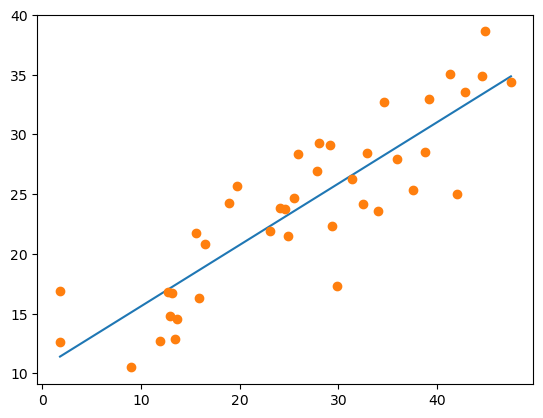

In [22]:
xlin = np.linspace(X.min(), X.max(), 200)
ylin = regressor.coef_[0] * xlin + regressor.intercept_

plt.plot(xlin, ylin)
plt.plot(X_train, y_train, 'o');

Podemos calcular la predicción para cada valor de $x$ de entrenamiento.

In [23]:
y_pred_train = regressor.predict(X_train)

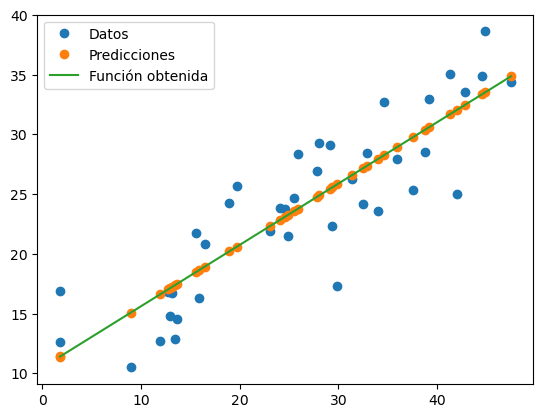

In [24]:
plt.plot(X_train, y_train, 'o', label="Datos")
plt.plot(X_train, y_pred_train, 'o', label="Predicciones")
plt.plot(xlin, ylin, label='Función obtenida')
plt.legend(loc='best')

## 2.4. Evaluación de Desempeño del Modelo

### 2.4.1. Gráfico Q-Q (QQ-Plot)

 

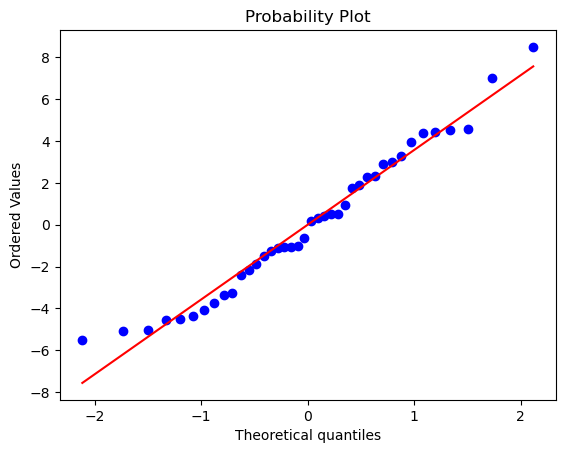

In [25]:
from scipy.stats import probplot

residuals = y_pred_train - y_train
_ = probplot(residuals, plot=plt)

# qqPlot, evalua la normalidad de los datos (En este caso, de los residuos)

### 2.4.2. Gráfico de Residuos

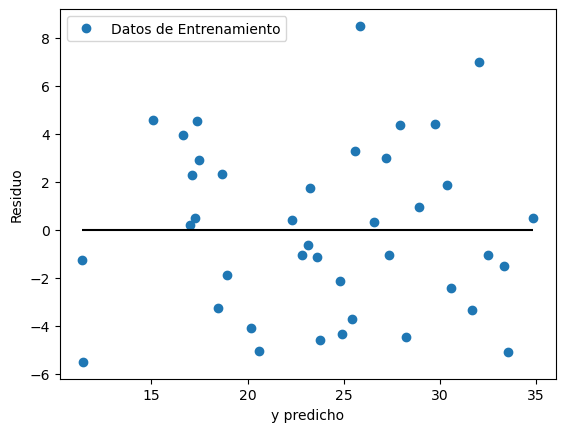

In [26]:
plt.plot(y_pred_train, residuals, 'o', label="Datos de Entrenamiento")
plt.hlines(y = 0, xmin = min(y_pred_train), xmax = max(y_pred_train), color = 'black')
plt.xlabel('y predicho')
plt.ylabel('Residuo')
plt.legend(loc='best')

## 2.5. Prueba con Datos de Validación
Ahora, probaremos que tan bien funciona con los datos de test.

In [27]:
y_pred_test = regressor.predict(X_test)

In [28]:
y_pred_test,y_test

(array([30.28713525, 14.49633163, 26.68786173, 30.25650105, 31.42685854,
        12.20963543, 13.47713064, 14.6307855 , 15.4580364 , 32.3123546 ]),
 array([28.32824943, 12.57561782, 28.54533511, 37.63495968, 32.76880578,
         9.75331303,  6.98780318, 10.2850758 ,  4.02879446, 37.18276558]))

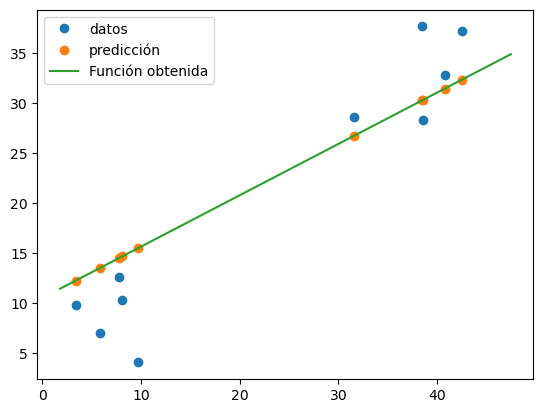

In [29]:
plt.plot(X_test, y_test, 'o', label="datos")
plt.plot(X_test, y_pred_test, 'o', label="predicción")
plt.plot(xlin, ylin, label='Función obtenida')
plt.legend(loc='best');

### 2.4.3. Métricas

Existen diferentes métricas para evaluar el desempeño del modelo y las estimaciones que pueden obtenerse. 
En regresión, las dos principales son el coeficiente de determinación $R^2$ y el Error Cuadrático Medio (Mean Squared Error MSE).
- Error Cuadrático Medio (MSE): 
$$MSE = \frac{1}{n} \sum_{i=1}^{n} (\widehat{y}^{(i)} - \text{y}^{(i)})^2$$
- Coeficiente de Determinación ($R^2$):
$$R^2 = 1 - \frac{SSE}{SST} = 1 - \frac{\frac{1}{n} \sum_{i=1}^{n} (\widehat{y}^{(i)} - \text{y}^{(i)})^2}{\frac{1}{n} \sum_{i=1}^{n} (\text{y}^{(i)} - \mu_y)^2} = 1 - \frac{MSE}{Var(y)}$$

SSE: Sum of squared errors

SST: Total sum of squared.


In [30]:
regressor.score(X_test, y_test) # Recordemos:cuanto más cercano a uno, mejor

0.81780575794638

In [31]:
from sklearn import metrics

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

print('Error Cuadrático Medio (Mean Squared Error): %.8f' % mean_squared_error(y_test, y_pred_test))
print('Coeficiente de Determinación (Coefficient of Determination): %.8f' % r2_score(y_test, y_pred_test))

Error Cuadrático Medio (Mean Squared Error): 28.85976148
Coeficiente de Determinación (Coefficient of Determination): 0.81780576
